# Modelling 3

# Installing packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing dataframe

df_final data frame has both explanatory variables which are encoded with binary coding for multiple choice questions and ordinal encoding for single choice questions and the target variable which is label encoded.


In [ ]:
df_final = pd.read_csv('df_final.csv',low_memory = False)
df_final = df_final.drop('Unnamed: 0', axis = 1).reset_index(drop = True)
df_final

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,3
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,8
13192,1,0,0,3,9,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,9


# Strategy 1

In Strategy 1, all the jobs were included for the analysis


In [ ]:
X = df_final.drop('target', axis = 1)
y = df_final.target

# Train, test split

Here, 90% of the data used as train data whereas 10% used as test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Resampling techniques for imbalanced data



In [ ]:
##Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 5     3119
4     3119
7     3119
9     3119
6     3119
2     3119
3     3119
10    3119
0     3119
1     3119
8     3119
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ro = []
test_score_ro = []
class_report_ro =pd.DataFrame()

for name, model in models:
    model.fit(X_ro, y_ro)
    train_accuracy= accuracy_score(y_ro, model.predict(X_ro))
    train_score_ro.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ro.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_ro = class_report_ro.append(class_report.iloc[:3,:11])
results_ro_train = pd.DataFrame(train_score_ro, columns = ['Model', 'Ro_train'])
results_ro_test = pd.DataFrame(test_score_ro, columns = ['Model', 'Ro_test'])
results_ro = pd.merge(results_ro_train, results_ro_test, on='Model')
print(results_ro)
print(class_report_ro)

  Model  Ro_train   Ro_test
0    LR  0.423504  0.337879
1   KNN  0.831764  0.250758
2    DT  0.984494  0.271970
3    RF  0.984494  0.417424
4   SVM  0.546883  0.359091
                  0         1         2         3         4         5  \
precision  0.177778  0.025316  0.322581  0.164706  0.570048  0.232704   
recall     0.173913  0.181818  0.258065  0.291667  0.397306  0.373737   
f1-score   0.175824  0.044444  0.286738  0.210526  0.468254  0.286822   
precision  0.153005  0.000000  0.195767  0.077922  0.577889  0.151079   
recall     0.304348  0.000000  0.238710  0.125000  0.387205  0.212121   
f1-score   0.203636  0.000000  0.215116  0.096000  0.463710  0.176471   
precision  0.104167  0.052632  0.195652  0.104167  0.448276  0.205882   
recall     0.108696  0.090909  0.174194  0.104167  0.481481  0.212121   
f1-score   0.106383  0.066667  0.184300  0.104167  0.464286  0.208955   
precision  0.255814  0.000000  0.306533  0.333333  0.463942  0.281818   
recall     0.119565  0.000000

In [ ]:
##SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_sm = []
test_score_sm= []
class_report_sm = pd.DataFrame()

for name, model in models:
    model.fit(X_sm, y_sm)
    train_accuracy= accuracy_score(y_sm, model.predict(X_sm))
    train_score_sm.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_sm.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_sm = class_report_sm.append(class_report.iloc[:3,:11])
results_sm_train = pd.DataFrame(train_score_sm, columns = ['Model', 'Smote_train'])
results_sm_test = pd.DataFrame(test_score_sm, columns = ['Model', 'Smote_test'])
results_sm = pd.merge(results_sm_train, results_sm_test, on='Model')
print(results_sm)
print(class_report_sm)


  Model  Smote_train  Smote_test
0    LR     0.429945    0.368939
1   KNN     0.793028    0.238636
2    DT     0.962721    0.277273
3    RF     0.962721    0.408333
4   SVM     0.499577    0.397727
                  0         1         2         3         4         5  \
precision  0.196721  0.040816  0.345588  0.150000  0.491289  0.271186   
recall     0.130435  0.181818  0.303226  0.187500  0.474747  0.323232   
f1-score   0.156863  0.066667  0.323024  0.166667  0.482877  0.294931   
precision  0.139535  0.000000  0.191860  0.070796  0.630137  0.208633   
recall     0.260870  0.000000  0.212903  0.166667  0.309764  0.292929   
f1-score   0.181818  0.000000  0.201835  0.099379  0.415350  0.243697   
precision  0.098361  0.000000  0.248120  0.138462  0.466431  0.169811   
recall     0.130435  0.000000  0.212903  0.187500  0.444444  0.181818   
f1-score   0.112150  0.000000  0.229167  0.159292  0.455172  0.175610   
precision  0.163265  0.111111  0.341463  0.285714  0.464103  0.268456   

In [ ]:
##ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 8     3417
5     3360
9     3243
4     3119
10    3094
1     3094
0     3080
2     3076
6     3057
3     2991
7     2922
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ad = []
test_score_ad= []
class_report_ad = pd.DataFrame()

for name, model in models:
    model.fit(X_ad, y_ad)
    train_accuracy= accuracy_score(y_ad, model.predict(X_ad))
    train_score_ad.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ad.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)  
    class_report_ad = class_report_ad.append(class_report.iloc[:3,:11])  
results_ad_train = pd.DataFrame(train_score_ad, columns = ['Model', 'Adasyn_train'])
results_ad_test = pd.DataFrame(test_score_ad, columns = ['Model', 'Adasyn_test'])
results_ad = pd.merge(results_ad_train, results_ad_test, on='Model')
print(results_ad)
print(class_report_ad)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ad = []
test_score_ad= []
class_report_ad = []

for name, model in models:
    model.fit(X_ad, y_ad)
    train_accuracy= (accuracy_score(y_ad, model.predict(X_ad))*100)
    train_score_ad.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = (accuracy_score(y_test,y_pred)*100)
    test_score_ad.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_ad.append(class_report.iloc[:,:11])  
results_ad_train = pd.DataFrame(train_score_ad, columns = ['Model', 'Adasyn_train'])
results_ad_test = pd.DataFrame(test_score_ad, columns = ['Model', 'Adasyn_test'])
results_ad = pd.merge(results_ad_train, results_ad_test, on='Model')
results_ad
class_report_ad = pd.DataFrame(class_report_ad)

# Performances on Train and Test Set

In [ ]:
model_evaluation_df = pd.concat([results_ro, results_sm, results_ad], axis = 1)
model_evaluation_df = model_evaluation_df.loc[:,~model_evaluation_df.columns.duplicated()]
model_evaluation_df.set_index('Model')

,Ro_train,Ro_test,Smote_train,Smote_test,Adasyn_train,Adasyn_test
Model,,,,,,
LR,0.423504,0.337879,0.429945,0.368939,0.416655,0.375758
KNN,0.831764,0.250758,0.793028,0.238636,0.786869,0.243182
DT,0.984494,0.271970,0.962721,0.277273,0.960555,0.275758
RF,0.984494,0.417424,0.962721,0.408333,0.960555,0.412879
SVM,0.546883,0.359091,0.499577,0.397727,0.485531,0.396970


Random Forest performs well when the Random oversampling technique is used. But this model doesn't perform well in test data because of overfitting.

# Classification Report


**Precision** **Scores**

In [ ]:
classifications = [class_report_ro, class_report_sm, class_report_ad]
technique = ['Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec


[                  0         1         2         3         4         5  \
precision  0.177778  0.025316  0.322581  0.164706  0.570048  0.232704   
recall     0.173913  0.181818  0.258065  0.291667  0.397306  0.373737   
f1-score   0.175824  0.044444  0.286738  0.210526  0.468254  0.286822   
precision  0.153005  0.000000  0.195767  0.077922  0.577889  0.151079   
recall     0.304348  0.000000  0.238710  0.125000  0.387205  0.212121   
f1-score   0.203636  0.000000  0.215116  0.096000  0.463710  0.176471   
precision  0.104167  0.052632  0.195652  0.104167  0.448276  0.205882   
recall     0.108696  0.090909  0.174194  0.104167  0.481481  0.212121   
f1-score   0.106383  0.066667  0.184300  0.104167  0.464286  0.208955   
precision  0.255814  0.000000  0.306533  0.333333  0.463942  0.281818   
recall     0.119565  0.000000  0.393548  0.083333  0.649832  0.313131   
f1-score   0.162963  0.000000  0.344633  0.133333  0.541374  0.296651   
precision  0.158416  0.075000  0.292517  0.180556 

,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.177778,0.025316,0.322581,0.164706,0.570048,0.232704,0.462185,0.123077,0.388889,0.590909,0.142857,Random oversamp.
KNN,0.153005,0.000000,0.195767,0.077922,0.577889,0.151079,0.240876,0.107438,0.346535,0.368421,0.131148,Random oversamp.
DT,0.104167,0.052632,0.195652,0.104167,0.448276,0.205882,0.259067,0.061728,0.252252,0.355932,0.166667,Random oversamp.
RF,0.255814,0.000000,0.306533,0.333333,0.463942,0.281818,0.445161,0.047619,0.495327,0.510549,0.368421,Random oversamp.
SVM,0.158416,0.075000,0.292517,0.180556,0.647887,0.250000,0.458333,0.125000,0.424779,0.557692,0.170213,Random oversamp.
LR,0.196721,0.040816,0.345588,0.150000,0.491289,0.271186,0.426752,0.117647,0.390244,0.524038,0.226415,SMOTE
KNN,0.139535,0.000000,0.191860,0.070796,0.630137,0.208633,0.286822,0.034188,0.342342,0.493827,0.123457,SMOTE
DT,0.098361,0.000000,0.248120,0.138462,0.466431,0.169811,0.308571,0.035294,0.286885,0.402597,0.173913,SMOTE
RF,0.163265,0.111111,0.341463,0.285714,0.464103,0.268456,0.489362,0.128205,0.438776,0.544643,0.206897,SMOTE
SVM,0.271429,0.111111,0.339744,0.176471,0.470238,0.271930,0.458599,0.152542,0.434343,0.560748,0.203704,SMOTE


**Recall**

In [ ]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.173913,0.181818,0.258065,0.291667,0.397306,0.373737,0.317919,0.133333,0.371212,0.411765,0.50000,Random oversamp.
KNN,0.304348,0.000000,0.238710,0.125000,0.387205,0.212121,0.190751,0.216667,0.265152,0.158371,0.25000,Random oversamp.
DT,0.108696,0.090909,0.174194,0.104167,0.481481,0.212121,0.289017,0.083333,0.212121,0.285068,0.18750,Random oversamp.
RF,0.119565,0.000000,0.393548,0.083333,0.649832,0.313131,0.398844,0.016667,0.401515,0.547511,0.21875,Random oversamp.
SVM,0.173913,0.272727,0.277419,0.270833,0.464646,0.444444,0.317919,0.183333,0.363636,0.393665,0.50000,Random oversamp.
LR,0.130435,0.181818,0.303226,0.187500,0.474747,0.323232,0.387283,0.133333,0.363636,0.493213,0.37500,SMOTE
KNN,0.260870,0.000000,0.212903,0.166667,0.309764,0.292929,0.213873,0.066667,0.287879,0.180995,0.31250,SMOTE
DT,0.130435,0.000000,0.212903,0.187500,0.444444,0.181818,0.312139,0.050000,0.265152,0.280543,0.25000,SMOTE
RF,0.086957,0.090909,0.361290,0.166667,0.609428,0.404040,0.398844,0.083333,0.325758,0.552036,0.18750,SMOTE
SVM,0.206522,0.272727,0.341935,0.125000,0.531987,0.313131,0.416185,0.150000,0.325758,0.542986,0.34375,SMOTE


**f1-scores**

In [ ]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,0,1,2,3,4,5,6,7,8,9,10,technique
LR,0.175824,0.044444,0.286738,0.210526,0.468254,0.286822,0.376712,0.128000,0.379845,0.485333,0.222222,Random oversamp.
KNN,0.203636,0.000000,0.215116,0.096000,0.463710,0.176471,0.212903,0.143646,0.300429,0.221519,0.172043,Random oversamp.
DT,0.106383,0.066667,0.184300,0.104167,0.464286,0.208955,0.273224,0.070922,0.230453,0.316583,0.176471,Random oversamp.
RF,0.162963,0.000000,0.344633,0.133333,0.541374,0.296651,0.420732,0.024691,0.443515,0.528384,0.274510,Random oversamp.
SVM,0.165803,0.117647,0.284768,0.216667,0.541176,0.320000,0.375427,0.148649,0.391837,0.461538,0.253968,Random oversamp.
LR,0.156863,0.066667,0.323024,0.166667,0.482877,0.294931,0.406061,0.125000,0.376471,0.508159,0.282353,SMOTE
KNN,0.181818,0.000000,0.201835,0.099379,0.415350,0.243697,0.245033,0.045198,0.312757,0.264901,0.176991,SMOTE
DT,0.112150,0.000000,0.229167,0.159292,0.455172,0.175610,0.310345,0.041379,0.275591,0.330667,0.205128,SMOTE
RF,0.113475,0.100000,0.351097,0.210526,0.526929,0.322581,0.439490,0.101010,0.373913,0.548315,0.196721,SMOTE
SVM,0.234568,0.157895,0.340836,0.146341,0.499210,0.291080,0.436364,0.151261,0.372294,0.551724,0.255814,SMOTE


We observed from the classification report that class 1 and 7 shows very low precision scores.

# **Graphs**

**Train and Test Scores**

The performance of different models on train and test scores are plotted in a line plot.

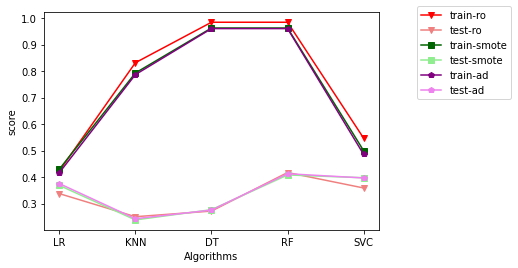

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, model_evaluation_df.iloc[:, 1], label='train-ro', marker='v', color='red')
plt.plot(x_axes, model_evaluation_df.iloc[:, 2], label='test-ro', marker='v', color='lightcoral')
plt.plot(x_axes, model_evaluation_df.iloc[:, 3], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 4], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 5], label='train-ad', marker='p', color='purple')
plt.plot(x_axes, model_evaluation_df.iloc[:, 6], label='test-ad', marker='p', color='violet')

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('score')
plt.show()

The line plot shows that train and test scores of the random sampling technique performs well for Random Forest. 

# **Classification reports for each class**

Based on the classification reports obtained for each model, a line plot is used to represent precision, recall, and F1 scores for each class.

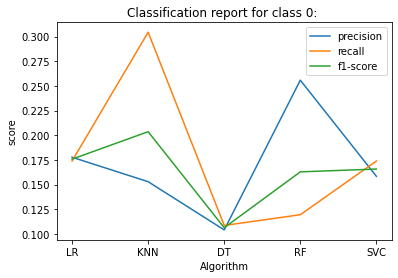

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 0:Business Analyst')
plt.show()

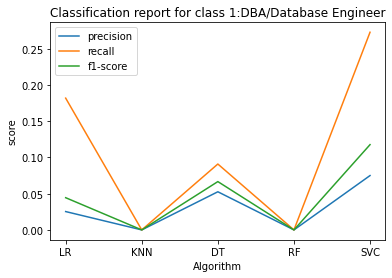

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 1:DBA/Database Engineer' )
plt.show()

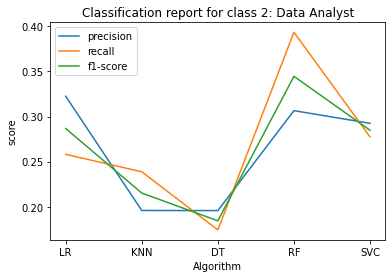

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst' )
plt.show()

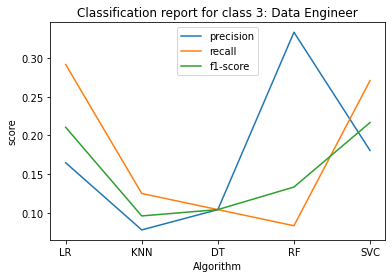

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 3: Data Engineer' )
plt.show()

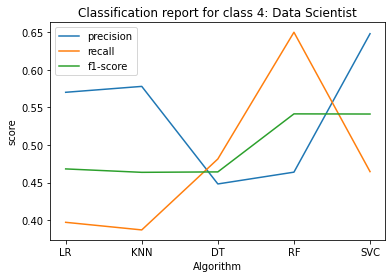

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist' )
plt.show()

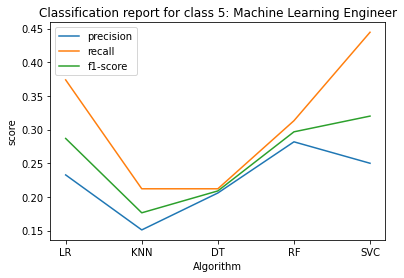

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 5], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 5], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 5], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 5: Machine Learning Engineer')
plt.show()

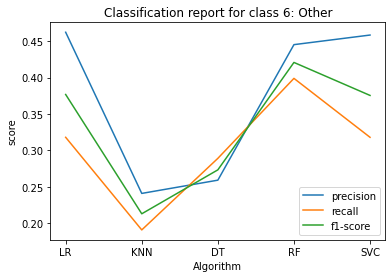

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 6], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 6], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 6], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

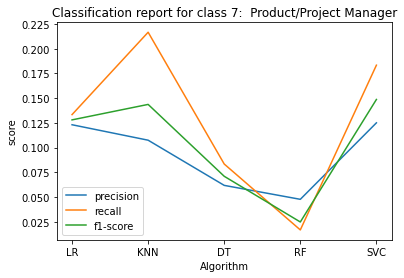

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 7], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 7], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 7], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 7:  Product/Project Manager')
plt.show()

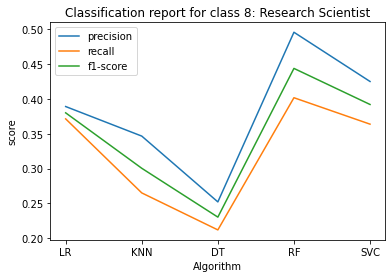

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 8], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 8], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 8], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

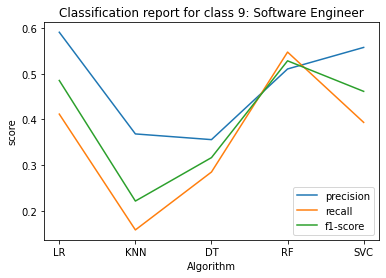

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 9], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 9], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 9], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer' )
plt.show()

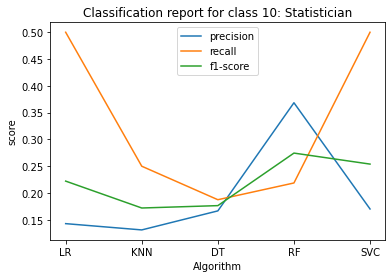

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 10], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 10], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 10], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 10: Statistician' )
plt.show()

For classes 1 &7, precision, recall and F1 scores are very low for Random Forest.

# **Stratified K fold cross validation**


Stratified K fold cross validation method is used to reduce the risk of overfitting.

In [ ]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.414859 (0.013932)
KNN: 0.311100 (0.017073)
DT: 0.296445 (0.015066)
RF: 0.428837 (0.012345)
SVM: 0.430102 (0.011719)


In [ ]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.408319 (0.010320)
KNN: 0.695036 (0.003610)
DT: 0.880498 (0.005529)
RF: 0.911685 (0.005175)
SVM: 0.505699 (0.007273)


HYPERPARAMETER TUNING

In [ ]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [ ]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.43565741143085174
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 500}
Best estimator: RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,
                       n_estimators=500)


Predicting the performance of Random Forest with best parameters on test data


In [ ]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 3, n_estimators = 500, random_state=0)
rf.fit(X_train,y_train)
print('Train score:', rf.score(X_train, y_train))
y_pred = rf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('Test score:', accuracy_score(y_test,y_pred))
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.7919824827353883
Confusion matrix: [[  1   0  26   0  32   0  20   0   1  12   0]
 [  0   0   1   0   3   0   3   0   0   4   0]
 [  1   0  54   0  64   0  20   0   1  15   0]
 [  0   0   4   0  27   2   0   0   1  14   0]
 [  0   0  19   0 236  11  10   0   4  17   0]
 [  0   0   4   0  50  17   2   0   7  19   0]
 [  0   0  16   0  37   3  83   2  10  22   0]
 [  0   0   8   0  22   0  12   0   0  18   0]
 [  0   0   8   0  50   5  19   0  32  18   0]
 [  0   0  13   0  52   4  10   0   3 138   1]
 [  0   0   9   0   8   0   6   0   4   1   4]]
Test score: 0.42803030303030304
classification report:               precision    recall  f1-score   support

           0       0.50      0.01      0.02        92
           1       0.00      0.00      0.00        11
           2       0.33      0.35      0.34       155
           3       0.00      0.00      0.00        48
           4       0.41      0.79      0.54       297
           5       0.40      0.17      0.24        9

The test score is 42%.This model doesn't perform well due to overfitting.


# **PCA**

PCA is used to address the overfitting problem.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, 
                                                    random_state=2)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_ad.append(class_report.iloc[:3,:11])  
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
print(results_pca)
print(class_report_pca)

  Model  Pca_train  Pca_test
0    LR   0.450059  0.410606
1   KNN   0.513138  0.310606
2    DT   0.983662  0.251515
3    RF   0.983662  0.378788
4   SVM   0.620768  0.420455
                  0         1         2         3         4         5  \
precision  0.194030  0.037736  0.350746  0.166667  0.512367  0.285714   
recall     0.141304  0.181818  0.303226  0.187500  0.488215  0.343434   
f1-score   0.163522  0.062500  0.325260  0.176471  0.500000  0.311927   
precision  0.152941  0.017241  0.160221  0.097345  0.654412  0.174699   
recall     0.282609  0.090909  0.187097  0.229167  0.299663  0.292929   
f1-score   0.198473  0.028986  0.172619  0.136646  0.411085  0.218868   
precision  0.155172  0.045455  0.232877  0.107692  0.467925  0.145985   
recall     0.195652  0.090909  0.219355  0.145833  0.417508  0.202020   
f1-score   0.173077  0.060606  0.225914  0.123894  0.441281  0.169492   
precision  0.190476  0.166667  0.366197  0.214286  0.470738  0.237037   
recall     0.130435  0.

Random Forest performs well on train data, but still overfitting exists.

In [ ]:
print('The eigenvalues are :', pca.explained_variance_)

The eigenvalues are : [19.11637663  7.35708935  5.66402807  4.17254095  3.59929317  3.43967616
  3.199131    3.11246392  2.87500805  2.734483    2.34298274  2.16984203
  2.11583156  2.00422184  1.97911847  1.80120465  1.73247083  1.67002723
  1.62027994  1.58803911  1.53107334  1.48135987  1.46773287  1.42721368
  1.40128595  1.36825415  1.34122507  1.29492708  1.26840056  1.26477223
  1.24785977  1.23925967  1.23620218  1.2109625   1.19633257  1.18008822
  1.17626366  1.16310442  1.15851554  1.13611049  1.1301348   1.12451761
  1.10827489  1.10486244  1.09284465  1.08479007  1.07338452  1.06256947
  1.06031202  1.05733611  1.04715111  1.04006384  1.03328077  1.02680308
  1.02504166  1.00805144  1.00074258  0.99368034  0.99209622  0.98857161
  0.97764459  0.97280412  0.96983518  0.96543136  0.96055823  0.95077798
  0.94448462  0.938906    0.93762636  0.92858176  0.92838322  0.92172906
  0.91896301  0.91425052  0.90792973  0.89728145  0.89291167  0.88841372
  0.88502645  0.88023154  0.8

In [ ]:
print('The ratios are :', pca.explained_variance_ratio_)

The ratios are : [0.08808722 0.03390107 0.02609953 0.01922684 0.01658535 0.01584984
 0.01474142 0.01434206 0.01324788 0.01260035 0.01079634 0.00999851
 0.00974964 0.00923535 0.00911967 0.00829985 0.00798313 0.00769539
 0.00746616 0.0073176  0.0070551  0.00682603 0.00676323 0.00657652
 0.00645705 0.00630484 0.00618029 0.00596695 0.00584472 0.005828
 0.00575007 0.00571044 0.00569635 0.00558005 0.00551264 0.00543778
 0.00542016 0.00535952 0.00533838 0.00523514 0.0052076  0.00518172
 0.00510687 0.00509115 0.00503577 0.00499865 0.0049461  0.00489626
 0.00488586 0.00487215 0.00482522 0.00479256 0.0047613  0.00473145
 0.00472334 0.00464505 0.00461137 0.00457882 0.00457153 0.00455528
 0.00450493 0.00448263 0.00446895 0.00444866 0.0044262  0.00438113
 0.00435213 0.00432643 0.00432053 0.00427885 0.00427794 0.00424728
 0.00423453 0.00421282 0.00418369 0.00413462 0.00411449 0.00409376
 0.00407815 0.00405606 0.00403491 0.00401777 0.00398594 0.0039562
 0.00392899 0.00390371 0.00387864 0.00383988 0.0

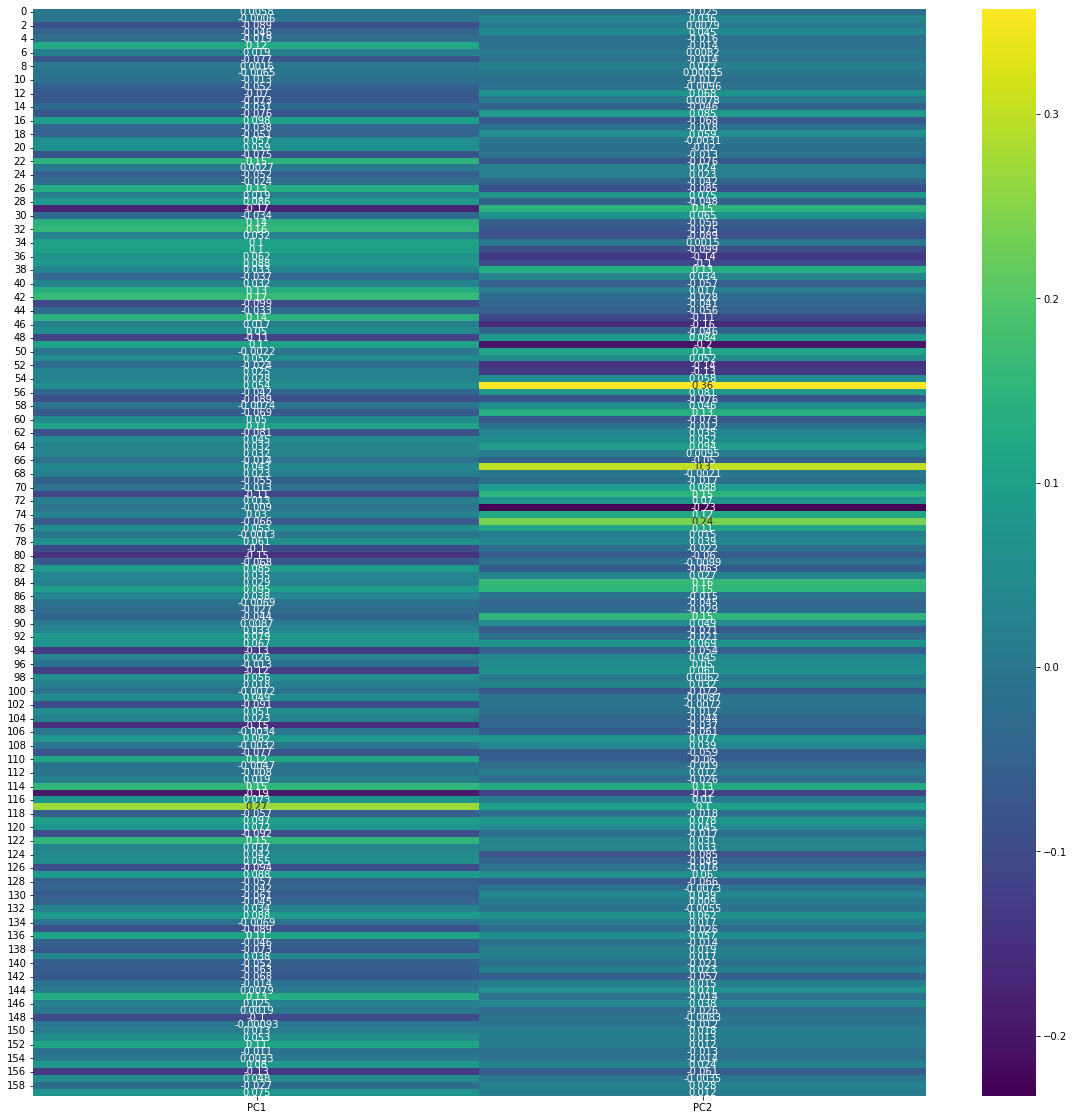

In [ ]:

plt.figure(figsize=(20, 20))  # Taille de la figure


Comp_PCA = pd.DataFrame(
    {'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.show()

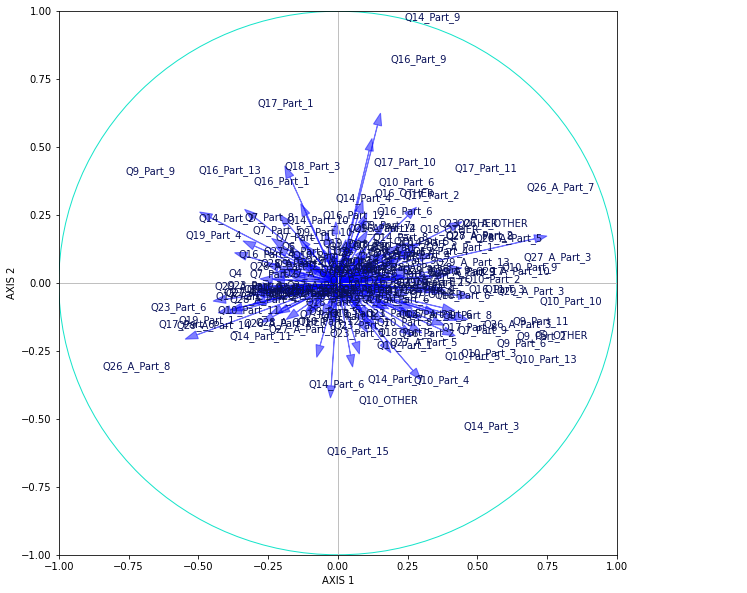

In [ ]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((160, 160))
for k in range(160):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(160):
    plt.annotate(X.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
              alpha=0.5, head_width=0.03, color='b')

# Adding Axis
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXIS 1')
plt.ylabel('AXIS 2')
plt.show()

As we have too many features in our dataset, it is difficult to interpret the circle plot.

# Strategy 1.1

In Strategy 1.1, jobs 1&7 were excluded for the analysis


In [ ]:
df1 = df_final[(df_final['target']==0) | (df_final['target']==2) | (df_final['target']==3) | (df_final['target']==4) | (df_final['target']==5)| (df_final['target']==6)| (df_final['target']==8)| (df_final['target']==9)| (df_final['target']==10)]
X = df1.drop('target', axis = 1)
y = df1.target
y.unique()

array([ 3,  9,  4,  2,  8,  6, 10,  5,  0])

# Train, test split

Here, 90% of the data used as train data whereas 10% used as test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# Resampling techniques for imbalanced data


In [ ]:
##Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 8     3076
2     3076
4     3076
9     3076
6     3076
0     3076
10    3076
3     3076
5     3076
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ro = []
test_score_ro = []
class_report_ro = pd.DataFrame()

for name, model in models:
    model.fit(X_ro, y_ro)
    train_accuracy= accuracy_score(y_ro, model.predict(X_ro))
    train_score_ro.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ro.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_ro = class_report_ro.append(class_report.iloc[:3,:9])
       
results_ro_train = pd.DataFrame(train_score_ro, columns = ['Model', 'Ro_train'])
results_ro_test = pd.DataFrame(test_score_ro, columns = ['Model', 'Ro_test'])
results_ro = pd.merge(results_ro_train, results_ro_test, on='Model')
print(results_ro)
print(class_report_ro)

,Model,Ro_train,Ro_test
0,LR,0.448960,0.392569
1,KNN,0.806386,0.277868
2,DT,0.986671,0.333603
3,RF,0.986671,0.450727
4,SVM,0.543419,0.425687


In [ ]:
##SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_sm = []
test_score_sm= []
class_report_sm = pd.DataFrame()

for name, model in models:
    model.fit(X_sm, y_sm)
    train_accuracy= accuracy_score(y_sm, model.predict(X_sm))
    train_score_sm.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_sm.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_sm = class_report_sm.append(class_report.iloc[:3,:9])
results_sm_train = pd.DataFrame(train_score_sm, columns = ['Model', 'Smote_train'])
results_sm_test = pd.DataFrame(test_score_sm, columns = ['Model', 'Smote_test'])
results_sm = pd.merge(results_sm_train, results_sm_test, on='Model')
print(results_sm)
print(class_report_sm)

  Model  Smote_train  Smote_test
0    LR     0.469477    0.406300
1   KNN     0.773624    0.249596
2    DT     0.966045    0.318255
3    RF     0.966045    0.441034
4   SVM     0.525936    0.431341
                  0         2         3         4         5         6  \
precision  0.174419  0.269737  0.163265  0.581699  0.256637  0.404110   
recall     0.170455  0.310606  0.156863  0.523529  0.281553  0.339080   
f1-score   0.172414  0.288732  0.160000  0.551084  0.268519  0.368750   
precision  0.135870  0.118750  0.104000  0.660494  0.189542  0.261745   
recall     0.284091  0.143939  0.254902  0.314706  0.281553  0.224138   
f1-score   0.183824  0.130137  0.147727  0.426295  0.226562  0.241486   
precision  0.113821  0.233766  0.142857  0.547297  0.165138  0.271605   
recall     0.159091  0.272727  0.176471  0.476471  0.174757  0.252874   
f1-score   0.132701  0.251748  0.157895  0.509434  0.169811  0.261905   
precision  0.258621  0.301887  0.200000  0.552239  0.281818  0.467890   

In [ ]:
##ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 5     3312
9     3255
2     3095
4     3076
0     3048
6     3015
10    3008
3     2961
8     2815
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
train_score_ad = []
test_score_ad= []
class_report_ad = pd.DataFrame()

for name, model in models:
    model.fit(X_ad, y_ad)
    train_accuracy= accuracy_score(y_ad, model.predict(X_ad))
    train_score_ad.append((name,train_accuracy))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_ad.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_ad = class_report_ad.append(class_report.iloc[:,:9])  
results_ad_train = pd.DataFrame(train_score_ad, columns = ['Model', 'Adasyn_train'])
results_ad_test = pd.DataFrame(test_score_ad, columns = ['Model', 'Adasyn_test'])
results_ad = pd.merge(results_ad_train, results_ad_test, on='Model')
print(results_ad)
print(class_report_ad)

  Model  Adasyn_train  Adasyn_test
0    LR      0.450498     0.146204
1   KNN      0.771833     0.109855
2    DT      0.962008     0.126817
3    RF      0.962008     0.165590
4   SVM      0.506688     0.150242
                   0           2          3           4           5  \
precision   0.050505    0.092199   0.081633    0.274247    0.097561   
recall      0.054348    0.096296   0.075472    0.237681    0.093023   
f1-score    0.052356    0.094203   0.078431    0.254658    0.095238   
support    92.000000  135.000000  53.000000  345.000000  129.000000   
precision   0.046392    0.123457   0.042169    0.279503    0.085526   
recall      0.097826    0.148148   0.132075    0.130435    0.100775   
f1-score    0.062937    0.134680   0.063927    0.177866    0.092527   
support    92.000000  135.000000  53.000000  345.000000  129.000000   
precision   0.067797    0.038961   0.016667    0.271777    0.088000   
recall      0.086957    0.044444   0.018868    0.226087    0.085271   
f1-score 

# **Performances on Train and Test Set**

In [ ]:
model_evaluation_df = pd.concat([results_ro, results_sm, results_ad], axis = 1)
model_evaluation_df = model_evaluation_df.loc[:,~model_evaluation_df.columns.duplicated()]
model_evaluation_df.set_index('Model')

,Ro_train,Ro_test,Smote_train,Smote_test,Adasyn_train,Adasyn_test
Model,,,,,,
LR,0.448960,0.392569,0.469477,0.406300,0.450498,0.146204
KNN,0.806386,0.277868,0.773624,0.249596,0.771833,0.109855
DT,0.986671,0.333603,0.966045,0.318255,0.962008,0.126817
RF,0.986671,0.450727,0.966045,0.441034,0.962008,0.165590
SVM,0.543419,0.425687,0.525936,0.431341,0.506688,0.150242


Again Random Forest performs well when the Random oversampling technique is used. Test data score slightly improved to 45% but still overfitting exists.

# **Classification Reports**

**Precision Scores**

In [ ]:
classifications = [class_report_ro, class_report_sm, class_report_ad]
technique = ['Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec

,0,2,3,4,5,6,8,9,10,technique
LR,0.186275,0.285714,0.150442,0.714286,0.245161,0.394958,0.368000,0.526316,0.197917,Random oversamp.
KNN,0.122093,0.145251,0.135135,0.642202,0.169492,0.271605,0.235714,0.390476,0.128571,Random oversamp.
DT,0.150538,0.271429,0.095238,0.516667,0.212963,0.250000,0.279661,0.367232,0.250000,Random oversamp.
RF,0.285714,0.267677,0.200000,0.569767,0.302083,0.417323,0.438776,0.513514,0.466667,Random oversamp.
SVM,0.274194,0.307143,0.170455,0.780822,0.240000,0.413534,0.468468,0.579268,0.238095,Random oversamp.
LR,0.174419,0.269737,0.163265,0.581699,0.256637,0.404110,0.359375,0.525822,0.333333,SMOTE
KNN,0.135870,0.118750,0.104000,0.660494,0.189542,0.261745,0.250000,0.406977,0.109890,SMOTE
DT,0.113821,0.233766,0.142857,0.547297,0.165138,0.271605,0.279070,0.397661,0.225806,SMOTE
RF,0.258621,0.301887,0.200000,0.552239,0.281818,0.467890,0.432692,0.495726,0.375000,SMOTE
SVM,0.237500,0.305556,0.157895,0.614943,0.269565,0.363057,0.430000,0.507109,0.288889,SMOTE


# **Recall**

In [ ]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,0,2,3,4,5,6,8,9,10,technique
LR,0.215909,0.227273,0.333333,0.529412,0.368932,0.270115,0.396552,0.459184,0.500000,Random oversamp.
KNN,0.238636,0.196970,0.196078,0.411765,0.194175,0.252874,0.284483,0.209184,0.236842,Random oversamp.
DT,0.159091,0.287879,0.078431,0.547059,0.223301,0.235632,0.284483,0.331633,0.236842,Random oversamp.
RF,0.136364,0.401515,0.039216,0.720588,0.281553,0.304598,0.370690,0.581633,0.184211,Random oversamp.
SVM,0.386364,0.325758,0.294118,0.502941,0.407767,0.316092,0.448276,0.484694,0.526316,Random oversamp.
LR,0.170455,0.310606,0.156863,0.523529,0.281553,0.339080,0.396552,0.571429,0.394737,SMOTE
KNN,0.284091,0.143939,0.254902,0.314706,0.281553,0.224138,0.275862,0.178571,0.263158,SMOTE
DT,0.159091,0.272727,0.176471,0.476471,0.174757,0.252874,0.310345,0.346939,0.184211,SMOTE
RF,0.170455,0.363636,0.117647,0.652941,0.300971,0.293103,0.387931,0.591837,0.315789,SMOTE
SVM,0.215909,0.333333,0.117647,0.629412,0.300971,0.327586,0.370690,0.545918,0.342105,SMOTE


# **f1-scores**

In [ ]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['LR', 'KNN', 'DT', 'RF', 'SVM'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,0,2,3,4,5,6,8,9,10,technique
LR,0.200000,0.253165,0.207317,0.608108,0.294574,0.320819,0.381743,0.490463,0.283582,Random oversamp.
KNN,0.161538,0.167203,0.160000,0.501792,0.180995,0.261905,0.257812,0.272425,0.166667,Random oversamp.
DT,0.154696,0.279412,0.086022,0.531429,0.218009,0.242604,0.282051,0.348525,0.243243,Random oversamp.
RF,0.184615,0.321212,0.065574,0.636364,0.291457,0.352159,0.401869,0.545455,0.264151,Random oversamp.
SVM,0.320755,0.316176,0.215827,0.611807,0.302158,0.358306,0.458150,0.527778,0.327869,Random oversamp.
LR,0.172414,0.288732,0.160000,0.551084,0.268519,0.368750,0.377049,0.547677,0.361446,SMOTE
KNN,0.183824,0.130137,0.147727,0.426295,0.226562,0.241486,0.262295,0.248227,0.155039,SMOTE
DT,0.132701,0.251748,0.157895,0.509434,0.169811,0.261905,0.293878,0.370572,0.202899,SMOTE
RF,0.205479,0.329897,0.148148,0.598383,0.291080,0.360424,0.409091,0.539535,0.342857,SMOTE
SVM,0.226190,0.318841,0.134831,0.622093,0.284404,0.344411,0.398148,0.525799,0.313253,SMOTE


# **Graphs**

**Train and Test Scores**

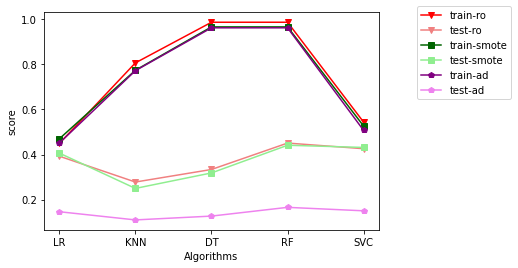

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, model_evaluation_df.iloc[:, 1], label='train-ro', marker='v', color='red')
plt.plot(x_axes, model_evaluation_df.iloc[:, 2], label='test-ro', marker='v', color='lightcoral')
plt.plot(x_axes, model_evaluation_df.iloc[:, 3], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 4], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, model_evaluation_df.iloc[:, 5], label='train-ad', marker='p', color='purple')
plt.plot(x_axes, model_evaluation_df.iloc[:, 6], label='test-ad', marker='p', color='violet')

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('Algorithms')
plt.ylabel('score')
plt.show()



# **Graphs**

**Classification reports for each class**


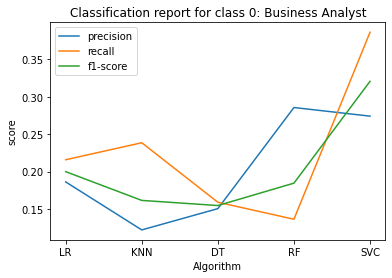

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 0: Business Analyst')
plt.show()

 **Classification reports for each class**

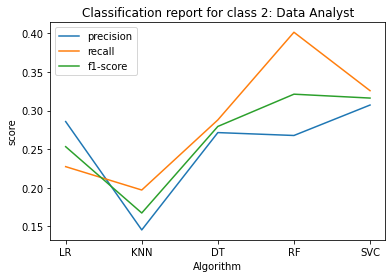

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst' )
plt.show()

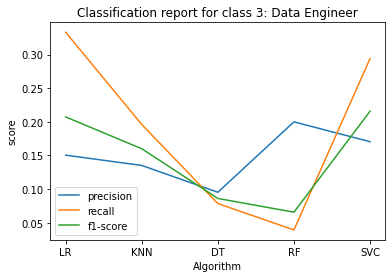

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 3: Data Engineer')
plt.show()

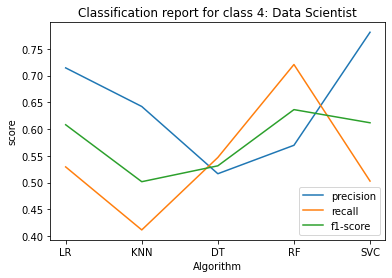

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist' )
plt.show()

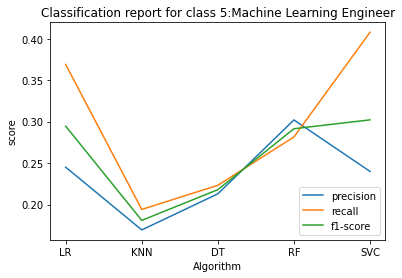

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 5:Machine Learning Engineer')
plt.show()

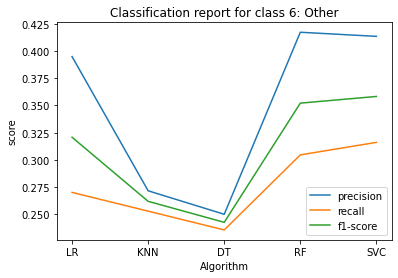

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 5], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 5], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 5], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

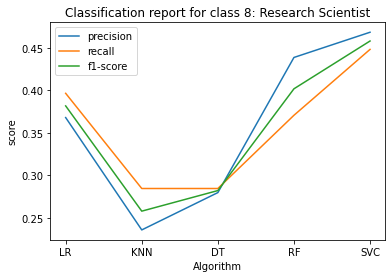

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 6], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 6], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 6], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

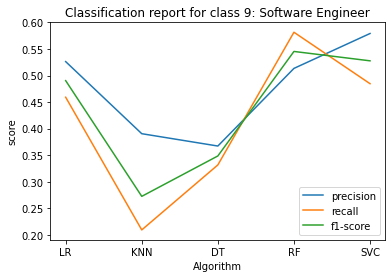

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 7], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 7], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 7], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer' )
plt.show()

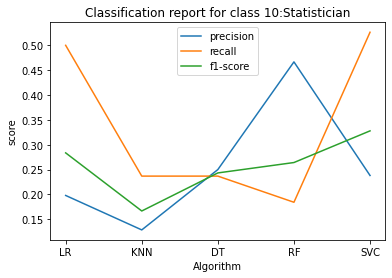

In [ ]:
x_axes = ['LR', 'KNN', 'DT','RF','SVC' ]
plt.plot(x_axes, reports_prec.iloc[0:5, 8], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 8], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 8], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 10:Statistician' )
plt.show()

SVM with class_weight balanced is used to treat imbalanced datasets.

In [ ]:
##SVM with class_weight balanced
svm_balanced = SVC(class_weight='balanced')
svm_balanced = svm_balanced.fit(X_train, y_train)
train_score = (accuracy_score(y_ad, svm_balanced.predict(X_ad))*100)
y_pred = svm_balanced.predict(X_test)
test_score = (accuracy_score(y_test,y_pred)*100)
print("Train score:", train_score)
print("Test score:", test_score)

Train score: 43.01790900290416
Test score: 39.29725363489499


The results obtained from SVM with class weighted balanced model is not good.

# **Stratified K fold cross validation**


In [ ]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.445190 (0.013944)
KNN: 0.337553 (0.009254)
DT: 0.326421 (0.007723)
RF: 0.463149 (0.014075)
SVM: 0.455427 (0.015034)


In [ ]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.433464 (0.005076)
KNN: 0.658070 (0.004293)
DT: 0.862773 (0.002990)
RF: 0.899292 (0.006040)
SVM: 0.507189 (0.007252)


# **HYPERPARAMETER TUNING**

In [ ]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]})

In [ ]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.4683551549088669
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}
Best estimator: RandomForestClassifier(max_features='sqrt', n_estimators=1000)


Predicting the performance of Random Forest with best parameters on test data


In [ ]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 1, n_estimators = 1000, random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Train score:', rf.score(X_train, y_train))
print('Test score:', accuracy_score(y_test,y_pred))
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print( classification_report(y_test,y_pred))

Train score: 0.9855462788401114
Test score: 0.4555735056542811
Confusion matrix: [[  5  24   0  31   4  13   1  10   0]
 [  5  50   0  42   3  17   0  13   2]
 [  3   7   0  24   2   2   1  12   0]
 [  0  24   0 279   9   9   5  14   0]
 [  0   8   0  40  13   7  12  23   0]
 [  4  20   0  43   2  60  15  30   0]
 [  0   5   0  35   1  17  42  16   0]
 [  1  11   0  50   7  10   4 113   0]
 [  0   6   0  12   0  10   5   3   2]]
              precision    recall  f1-score   support

           0       0.28      0.06      0.09        88
           2       0.32      0.38      0.35       132
           3       0.00      0.00      0.00        51
           4       0.50      0.82      0.62       340
           5       0.32      0.13      0.18       103
           6       0.41      0.34      0.38       174
           8       0.49      0.36      0.42       116
           9       0.48      0.58      0.53       196
          10       0.50      0.05      0.10        38

    accuracy             

The test score is 45%.This model doesn't perform well due to overfitting

# **PCA**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, 
                                                    random_state=2)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_ad.append(class_report.iloc[:3,:9])
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
results_pca

,Model,Pca_train,Pca_test
0,LR,0.475357,0.442649
1,KNN,0.535775,0.364297
2,DT,0.985277,0.283522
3,RF,0.985277,0.395800
4,SVM,0.644851,0.450727


In [ ]:
class_report_pca

,0,2,3,4,5,6,8,9,10
precision,0.181818,0.255319,0.163265,0.581940,0.252033,0.420690,0.371901,0.506977,0.326087
recall,0.204545,0.272727,0.156863,0.511765,0.300971,0.350575,0.387931,0.556122,0.394737
f1-score,0.192513,0.263736,0.160000,0.544601,0.274336,0.382445,0.379747,0.530414,0.357143
support,88.000000,132.000000,51.000000,340.000000,103.000000,174.000000,116.000000,196.000000,38.000000
precision,0.113402,0.172840,0.066265,0.677019,0.138158,0.311321,0.236842,0.447059,0.142857
recall,0.250000,0.212121,0.215686,0.320588,0.203883,0.189655,0.232759,0.193878,0.368421
f1-score,0.156028,0.190476,0.101382,0.435130,0.164706,0.235714,0.234783,0.270463,0.205882
support,88.000000,132.000000,51.000000,340.000000,103.000000,174.000000,116.000000,196.000000,38.000000
precision,0.156250,0.173077,0.098361,0.566434,0.177778,0.285714,0.279661,0.481752,0.214286
recall,0.227273,0.204545,0.117647,0.476471,0.233010,0.287356,0.284483,0.336735,0.236842


Random Forest performs well on train data, but the test score is 39% which shows that still overfitting exists.

In [ ]:
print('The eigenvalues are :', pca.explained_variance_)



The eigenvalues are : [19.28613621  7.44291497  5.66023302  4.17301179  3.58570372  3.44725975
  3.20612202  3.0897566   2.88839448  2.75927155  2.34506057  2.16190069
  2.12468154  2.00916825  1.98658346  1.80227109  1.72272921  1.67037839
  1.61774025  1.58042401  1.53037106  1.47424842  1.46777962  1.42923778
  1.404121    1.37005724  1.33452594  1.30181321  1.27682332  1.26590486
  1.25026597  1.23995816  1.2369153   1.21249182  1.20012983  1.186061
  1.18065991  1.16491088  1.15170174  1.13491322  1.12812779  1.12501473
  1.10888665  1.10648978  1.09316155  1.08658756  1.08088828  1.06710603
  1.06377682  1.05290142  1.04905779  1.04828481  1.03389828  1.02488299
  1.018874    1.01572126  1.00390152  0.99427427  0.99323457  0.98316753
  0.97861269  0.97070911  0.96511482  0.96062285  0.95783345  0.95400067
  0.94830437  0.94275591  0.93725376  0.93301493  0.93054591  0.92527513
  0.9217837   0.90663254  0.90553672  0.89945922  0.89877333  0.89058384
  0.88452957  0.87848492  0.875

In [ ]:
print('The ratios are :', pca.explained_variance_ratio_)

The ratios are : [0.08886902 0.03429638 0.02608192 0.01922892 0.01652265 0.01588471
 0.01477356 0.01423736 0.0133095  0.01271451 0.01080586 0.00996187
 0.00979037 0.00925809 0.00915402 0.00830473 0.0079382  0.00769697
 0.00745442 0.00728247 0.00705183 0.00679322 0.00676341 0.00658582
 0.00647008 0.00631312 0.00614939 0.00599865 0.0058835  0.00583319
 0.00576113 0.00571363 0.00569961 0.00558707 0.00553011 0.00546528
 0.00544039 0.00536782 0.00530695 0.00522959 0.00519833 0.00518398
 0.00510966 0.00509862 0.0050372  0.00500691 0.00498065 0.00491714
 0.0049018  0.00485169 0.00483398 0.00483042 0.00476412 0.00472258
 0.00469489 0.00468036 0.0046259  0.00458154 0.00457675 0.00453036
 0.00450937 0.00447295 0.00444717 0.00442648 0.00441362 0.00439596
 0.00436971 0.00434415 0.00431879 0.00429926 0.00428788 0.0042636
 0.00424751 0.00417769 0.00417264 0.00414464 0.00414148 0.00410374
 0.00407584 0.00404799 0.00403641 0.00401338 0.00398928 0.00396169
 0.00393328 0.00389763 0.00386853 0.00383999 0

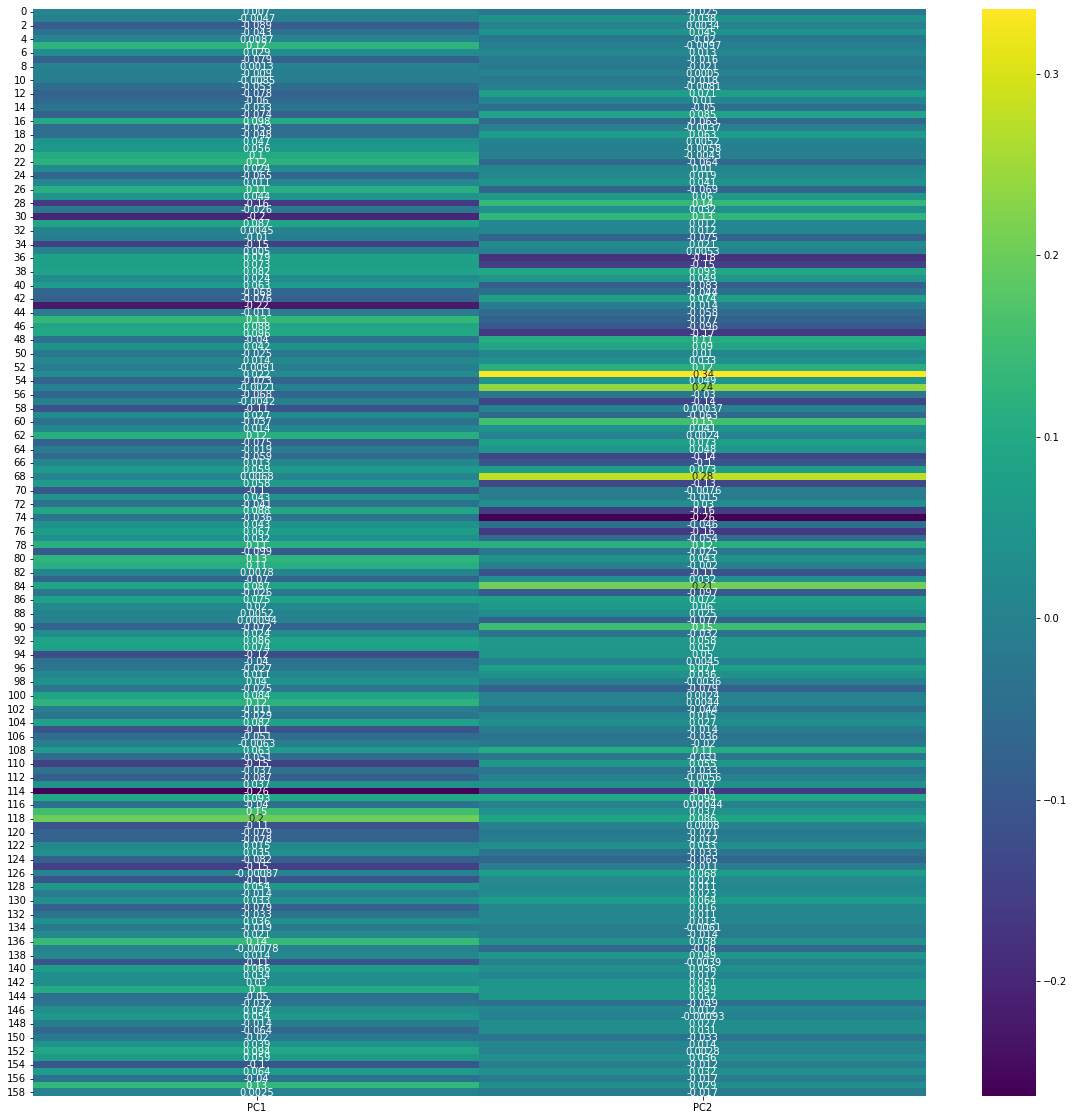

In [ ]:

plt.figure(figsize=(20, 20))  # Taille de la figure


Comp_PCA = pd.DataFrame(
    {'PC1': pca.components_[:, 0], 'PC2': pca.components_[:, 1]})

sns.heatmap(Comp_PCA, annot=True, cmap='viridis')
plt.show()

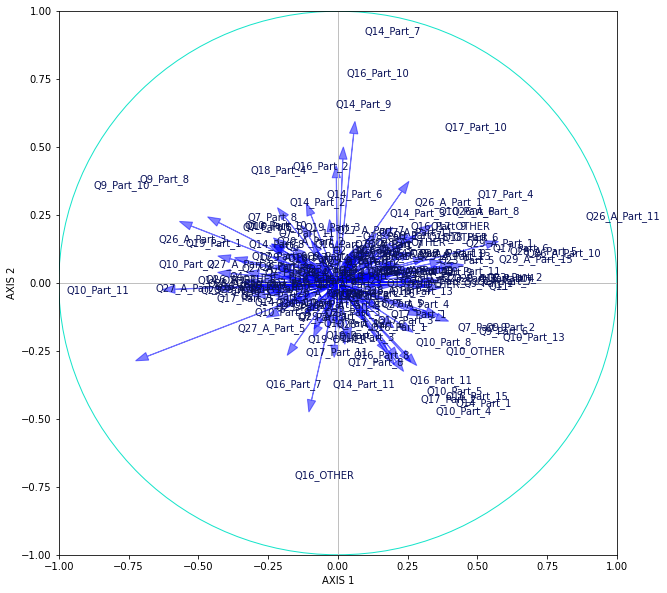

In [ ]:
racine_valeurs_propres = np.sqrt(pca.explained_variance_)
corvar = np.zeros((159, 159))
for k in range(159):
    corvar[:, k] = pca.components_[:, k] * racine_valeurs_propres[k]

# Delimitation 
fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)

# Displaying variables
for j in range(159):
    plt.annotate(X.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
              alpha=0.5, head_width=0.03, color='b')

# Adding Axis
plt.plot([-1, 1], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-1, 1], color='silver', linestyle='-', linewidth=1)

# Circle and labels
cercle = plt.Circle((0, 0), 1, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXIS 1')
plt.ylabel('AXIS 2')
plt.show()

In [ ]:
PCA_mat = pd.DataFrame(
    {'AXIS 1': X_pca[:, 0], 'AXIS 2': X_pca[:, 1], 'target': y})

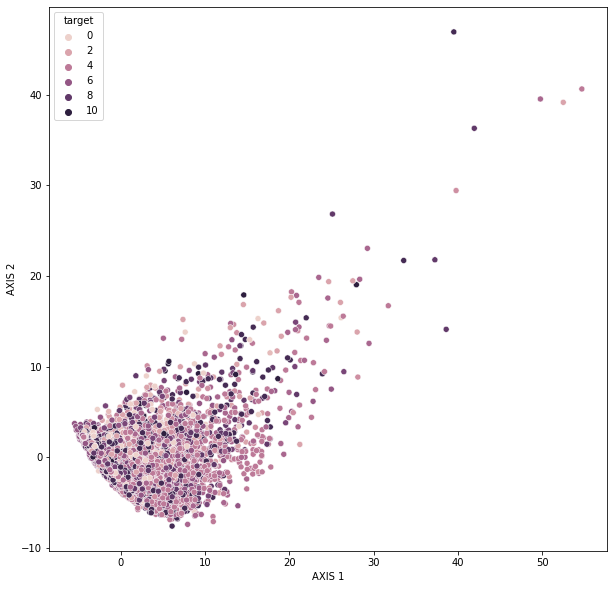

In [ ]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='AXIS 1', y='AXIS 2', hue=y, data=PCA_mat)

plt.show()

It is not a good representation of our data as our target variables  are concentrated in the same area.


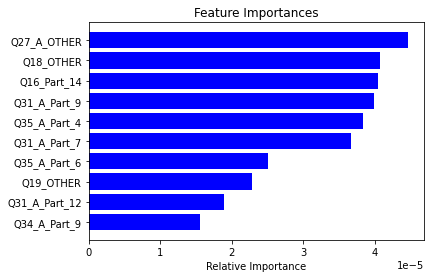

In [ ]:
features = df_final.columns
importances = rf.feature_importances_
#indices = np.argsort(importances)

indices = np.argsort(importances)[:10]

# customized number 
num_features = 10 

#plt.figure(figsize=(10,100))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

# Strategy 2

In [ ]:
df_final.head()

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,3
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2


## Identifying the top 5 represented jobs

In [ ]:
df_final['target'].value_counts().head()

4    3416
9    1968
6    1737
2    1475
8    1174
Name: target, dtype: int64

## Creating subset of df containing only the  5 most represented jobs

In [ ]:
df_top = df_final[(df_final['target']==4) | (df_final['target']==9) | (df_final['target']==6) | (df_final['target']==2) | (df_final['target']==8)]
df_top

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2
5,4,0,1,4,9,0,2,3,1,0,...,0,0,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13188,4,0,0,1,9,2,7,4,0,0,...,0,0,0,0,0,0,0,0,1,6
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,8


## Splitting data into target and explanatory variables

In [ ]:
target= df_top['target']
data = df_top.drop('target', axis=1)

## Splitting data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.1)

## Comparing different oversampling techniques

In [ ]:
# random oversampler
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)

# SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

# ADASYN
ada = ADASYN()
x_ada, y_ada = ada.fit_resample(X_train, y_train)

## Testing different models

**No oversampling**

In [ ]:
scores_test_noOs = []
scores_train_noOs = []
classification = pd.DataFrame()

In [ ]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]
for model in model:
    model.fit(X_train, y_train)
    testy_pred = model.predict(X_test)
    scores_test_noOs.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_noOs.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    classification = classification.append(report.iloc[:3, :5])

**Random oversampling**

In [ ]:
scores_test_ro = []
scores_train_ro = []
class_ro = pd.DataFrame()

In [ ]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]
for model in model:
    model.fit(X_ro, y_ro)
    testy_pred = model.predict(X_test)
    scores_test_ro.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_ro.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_ro = class_ro.append(report.iloc[:3, :5])

**SMOTE**

In [ ]:
scores_test_SMOTE = []
scores_train_SMOTE = []
class_SMOTE = pd.DataFrame()

In [ ]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in model:
    model.fit(X_sm, y_sm)
    testy_pred = model.predict(X_test)
    scores_test_SMOTE.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_SMOTE.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_SMOTE = class_SMOTE.append(report.iloc[:3, :5])

**ADASYN**

In [ ]:
scores_test_ada = []
scores_train_ada = []
class_ada = pd.DataFrame()

In [ ]:
model = [SVC(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression()]

for model in model:
    model.fit(x_ada, y_ada)
    testy_pred = model.predict(X_test)
    scores_test_ada.append(accuracy_score(y_test,testy_pred))
    trainy_pred = model.predict(X_train)
    scores_train_ada.append(accuracy_score(y_train,trainy_pred))
    report = classification_report(y_train, trainy_pred, output_dict=True)
    report = pd.DataFrame(report)
    class_ada = class_ada.append(report.iloc[:3, :5])

## Performances on Test Set

In [ ]:
scores_test = pd.DataFrame({'no oversampling': scores_test_noOs,
                      'random oversampling': scores_test_ro,
                      'SMOTE': scores_test_SMOTE,
                      'ADASYN': scores_test_ada}, index=['SVM', 'KNN', 'RF', 'DT', 'LR'])
scores_test

,no oversampling,random oversampling,SMOTE,ADASYN
SVM,0.564995,0.563971,0.563971,0.562948
KNN,0.463664,0.412487,0.430911,0.415558
RF,0.578301,0.592631,0.568066,0.566018
DT,0.457523,0.461617,0.444217,0.443193
LR,0.567042,0.540430,0.546571,0.542477


## Performances on Training Set

In [ ]:
scores_train = pd.DataFrame({'no oversampling': scores_train_noOs,
                      'random oversampling': scores_train_ro,
                      'SMOTE': scores_train_SMOTE,
                      'ADASYN': scores_train_ada}, index=['SVM', 'KNN', 'RF', 'DT', 'LR'])
scores_train

,no oversampling,random oversampling,SMOTE,ADASYN
SVM,0.609690,0.613556,0.605823,0.606278
KNN,0.616172,0.656772,0.681565,0.717048
RF,0.989765,0.989423,0.986694,0.987490
DT,0.989765,0.989423,0.987149,0.987718
LR,0.585352,0.566815,0.567952,0.566473


All algorithms perform better on the training than on the test set, so the models are still overfitting.

## Classification reports

**Precision Scores**

In [ ]:
classifications = [classification, class_ro, class_SMOTE, class_ada]
technique = ['No oversampling', 'No oversampling', 'No oversampling', 'No oversampling', 'No oversampling',
            'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.', 'Random oversamp.',
            'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE', 'SMOTE',
            'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN', 'ADASYN']
reports_prec = pd.DataFrame()
for report in classifications:
    precision = report.loc['precision'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_prec = reports_prec.append(precision)
reports_prec['technique'] = technique
reports_prec

,2,4,6,8,9,technique
SVC,0.553447,0.621998,0.546218,0.609984,0.654424,No oversampling
KNN,0.488616,0.674792,0.530284,0.610583,0.750673,No oversampling
RF,0.993930,0.983073,0.986443,0.994297,0.998853,No oversampling
DT,0.986517,0.983078,0.988342,0.999041,1.000000,No oversampling
LR,0.506542,0.611486,0.519672,0.544966,0.636623,No oversampling
SVC,0.459474,0.789710,0.533429,0.505864,0.671452,Random oversamp.
KNN,0.514628,0.837838,0.597065,0.576818,0.754505,Random oversamp.
RF,0.992436,0.986491,0.987063,0.982293,0.998853,Random oversamp.
DT,0.990943,0.986491,0.987072,0.982293,1.000000,Random oversamp.
LR,0.441076,0.713300,0.491616,0.431517,0.634768,Random oversamp.


**Recall**

In [ ]:
reports_recall = pd.DataFrame()
for report in classifications:
    recall = report.loc['recall'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_recall = reports_recall.append(recall)
reports_recall['technique'] = technique
reports_recall

,2,4,6,8,9,technique
SVC,0.415292,0.839002,0.419084,0.369565,0.667045,No oversampling
KNN,0.627436,0.789116,0.553191,0.425331,0.474759,No oversampling
RF,0.982009,0.997085,0.985171,0.988658,0.987521,No oversampling
DT,0.987256,0.997408,0.983881,0.984877,0.986387,No oversampling
LR,0.406297,0.793327,0.408769,0.383743,0.633012,No oversampling
SVC,0.641679,0.626498,0.478401,0.611531,0.689733,Random oversamp.
KNN,0.804348,0.582443,0.682141,0.794896,0.570051,Random oversamp.
RF,0.983508,0.993521,0.983881,0.996219,0.987521,Random oversamp.
DT,0.984258,0.993521,0.984526,0.996219,0.986387,Random oversamp.
LR,0.577961,0.602851,0.415861,0.553875,0.635848,Random oversamp.


**f1-scores**

In [ ]:
reports_f1 = pd.DataFrame()
for report in classifications:
    f1 = report.loc['f1-score'].set_axis(['SVC', 'KNN', 'RF', 'DT', 'LR'], axis=0)
    reports_f1 = reports_f1.append(f1)
reports_f1['technique'] = technique
reports_f1

,2,4,6,8,9,technique
SVC,0.474518,0.714384,0.474279,0.460271,0.660674,No oversampling
KNN,0.549393,0.727490,0.541496,0.501393,0.581654,No oversampling
RF,0.987934,0.990029,0.985806,0.991469,0.993155,No oversampling
DT,0.986886,0.990191,0.986107,0.991909,0.993147,No oversampling
LR,0.450915,0.690637,0.457597,0.450361,0.634812,No oversampling
SVC,0.535502,0.698699,0.504419,0.553701,0.680470,Random oversamp.
KNN,0.627669,0.687178,0.636774,0.668521,0.649435,Random oversamp.
RF,0.987952,0.989994,0.985470,0.989207,0.993155,Random oversamp.
DT,0.987589,0.989994,0.985797,0.989207,0.993147,Random oversamp.
LR,0.500324,0.653441,0.450576,0.485099,0.635307,Random oversamp.


## Graphs

**Train and Test Scores**

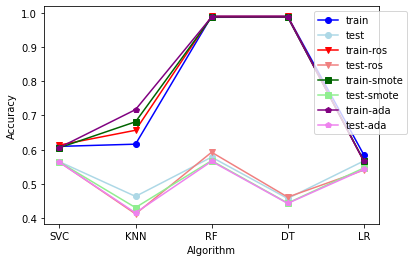

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
fig = plt.figure(facecolor=(1, 1, 1))
plt.plot(x_axes, scores_train.iloc[:, 0], label='train', marker='o', color='blue')
plt.plot(x_axes, scores_test.iloc[:, 0], label='test', marker='o', color='lightblue')
plt.plot(x_axes, scores_train.iloc[:, 1], label='train-ros', marker='v', color='red')
plt.plot(x_axes, scores_test.iloc[:, 1], label='test-ros', marker='v', color='lightcoral')
plt.plot(x_axes, scores_train.iloc[:, 2], label='train-smote', marker='s', color='darkgreen')
plt.plot(x_axes, scores_test.iloc[:, 2], label='test-smote', marker='s', color='lightgreen')
plt.plot(x_axes, scores_train.iloc[:, 3], label='train-ada', marker='p', color='purple')
plt.plot(x_axes, scores_test.iloc[:, 3], label='test-ada', marker='p', color='violet')

plt.legend(bbox_to_anchor=(0.5, 0.5, 0.6, 0.5))
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
fig.savefig('Train_Test_Score_Strat2.png', dpi=300)
plt.show()

**Classification reports for each class**

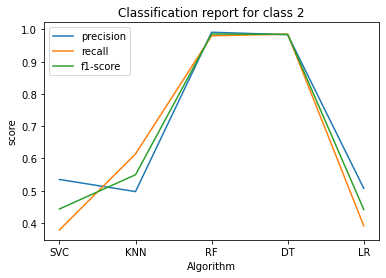

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 0], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 0], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 0], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 2: Data Analyst')
plt.show()

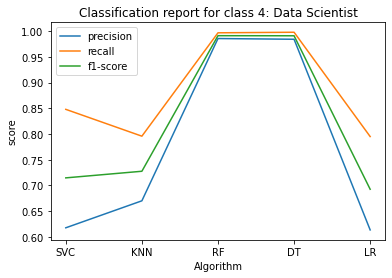

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 1], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 1], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 1], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 4: Data Scientist')
plt.show()

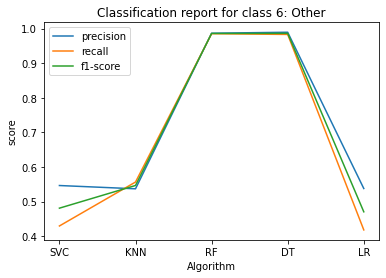

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 2], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 2], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 2], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 6: Other')
plt.show()

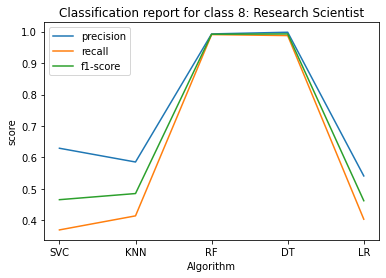

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 3], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 3], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 3], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 8: Research Scientist')
plt.show()

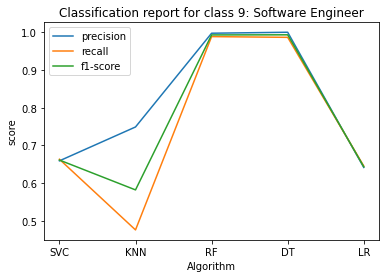

In [ ]:
x_axes = ['SVC', 'KNN', 'RF', 'DT', 'LR']
plt.plot(x_axes, reports_prec.iloc[0:5, 4], label = "precision")
plt.plot(x_axes, reports_recall.iloc[0:5, 4], label = "recall")
plt.plot(x_axes, reports_f1.iloc[0:5, 4], label = "f1-score")
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('score')
plt.title('Classification report for class 9: Software Engineer')
plt.show()

## Stratified KFold Crossvalidation

In [ ]:
#Without resampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.553052 (0.015170)
KNN: 0.450017 (0.015402)
DT: 0.446719 (0.018918)
RF: 0.582051 (0.019279)
SVM: 0.570336 (0.014065)


In [ ]:
#Random Oversampling
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
results = []
names = []
scoring = 'accuracy'
for name, model in models:
     kfold = StratifiedKFold(n_splits=10, shuffle=True)
     cv_results =cross_val_score(model, X_ro, y_ro, cv=kfold, scoring=scoring)
     results.append(cv_results)
     names.append(name)
     cv1= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(cv1)

LR: 0.551348 (0.013101)
KNN: 0.581406 (0.013667)
DT: 0.811857 (0.009172)
RF: 0.865889 (0.009581)
SVM: 0.590604 (0.012489)


Decision Tree and Random Forest show the best performances, with Random Forest being slightly ahead.
In the next step, we search for the best hyperparameters in a random forest model.

**Parameter Tuning for the RandomForest model**

In [ ]:
rf = RandomForestClassifier()
param_grid = {'max_features': ['sqrt', 'log2', 'None'], 
             'n_estimators': [10, 50, 100, 250, 500, 1000],
             'min_samples_leaf': [1, 3, 5]}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [10, 50, 100, 250, 500, 1000]},
             scoring='accuracy')

In [ ]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5866029796428976
{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
RandomForestClassifier(n_estimators=500)


**Training the RandomForest model with the best parameters**

In [ ]:
rf = RandomForestClassifier(max_features='sqrt', min_samples_leaf=1, n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 51  58  17   0  15]
 [ 19 271  10   8  21]
 [ 24  46  75  11  30]
 [  9  30  16  43  18]
 [  9  36  15   1 144]]
0.5977482088024565


On the test data, the model only reaches ~60%.

# PCA
We try to optimize the performance by using PCA for dimension reduction

In [ ]:
scaler = StandardScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)

pca = PCA(n_components=0.95) #select number of components while preserving 95% of variability
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, target, test_size=0.10, 
                                                    random_state=2)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_pca.append(class_report.iloc[:3,:9])
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
results_pca

,Model,Pca_train,Pca_test
0,LR,0.586603,0.531218
1,KNN,0.620039,0.460594
2,DT,0.989537,0.397134
3,RF,0.989537,0.547595
4,SVM,0.735699,0.563971


In [ ]:
class_report_pca

,2,4,6,8,9,accuracy,macro avg,weighted avg
precision,0.480000,0.580499,0.436090,0.405941,0.587571,0.531218,0.498020,0.520940
recall,0.402685,0.709141,0.358025,0.338843,0.565217,0.531218,0.474782,0.531218
f1-score,0.437956,0.638404,0.393220,0.369369,0.576177,0.531218,0.483025,0.522141
precision,0.299020,0.605333,0.380952,0.263889,0.543103,0.460594,0.418460,0.467405
recall,0.409396,0.628809,0.493827,0.157025,0.342391,0.460594,0.406290,0.460594
f1-score,0.345609,0.616848,0.430108,0.196891,0.420000,0.460594,0.401891,0.455434
precision,0.265152,0.574713,0.293814,0.180328,0.408840,0.397134,0.344569,0.400842
recall,0.234899,0.554017,0.351852,0.181818,0.402174,0.397134,0.344952,0.397134
f1-score,0.249110,0.564175,0.320225,0.181070,0.405479,0.397134,0.344012,0.398340
precision,0.537313,0.557522,0.524590,0.461538,0.554348,0.547595,0.527062,0.536494


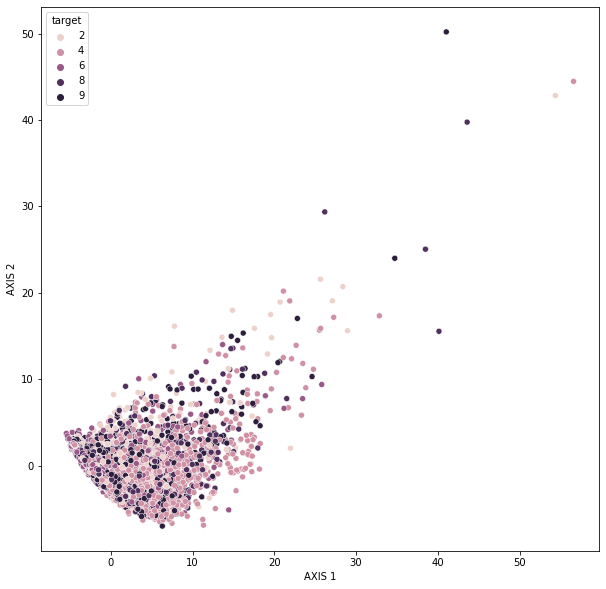

In [ ]:
PCA_mat = pd.DataFrame(
    {'AXIS 1': X_pca[:, 0], 'AXIS 2': X_pca[:, 1], 'target': target})

plt.figure(figsize=(10, 10))
sns.scatterplot(x='AXIS 1', y='AXIS 2', hue=target, data=PCA_mat)
plt.show()

## Boosting techniques

**XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [ ]:
xg_class = xgb.XGBClassifier(objective="multi:softmax", num_class=5)

The target variable needs to start from 0 for xgboost to work, so we use label encoding on it

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{2: 0, 4: 1, 6: 2, 8: 3, 9: 4}


In [ ]:
xg_class.fit(X_train,y_train)

preds = xg_class.predict(X_test)
accuracy_score(y_test,preds)

0.0511770726714432

We try to improve performance using GridSearch

In [ ]:
param_grid = {
    "max_depth": [5, 7, 10],
    "learning_rate": [0.1, 0.3, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "subsample": [0.8],
    "colsample_bytree": [0.5, 0.7]
}

scoring = 'accuracy'

xgb_class = xgb.XGBClassifier()
grid_cv = GridSearchCV(xgb_class, param_grid, n_jobs=-1, cv=3, scoring=scoring)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.7], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.3, 0.05],
                         'max_depth': [5, 7, 10], 'reg_lambda': [0, 1, 10],
                         'subsample': [0.8]},
             scoring='accuracy')

In [ ]:
grid_cv.best_score_

0.6079826121028837

Performance greatly improved, but is still not as good as desired (>75%).

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 10,
 'subsample': 0.8}

**AdaBoost**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# Initiate a random forest model
rf = RandomForestClassifier(max_depth=5, n_estimators=500)
rf.fit(X_train, y_train)

from sklearn.ensemble import AdaBoostClassifier

ac = AdaBoostClassifier(base_estimator=rf, n_estimators=500)
ac.fit(X_train, y_train)
ac.score(X_test, y_test)

0.5834186284544524

In [ ]:
y_pred = ac.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])

Predicted,2,4,6,8,9
True,,,,,
2,121,97,42,12,27
4,69,497,31,36,45
6,48,70,165,27,46
8,12,51,33,119,18
9,15,57,56,22,238
